### Performance examination of bottlenecks 

This is a small example on how the current performance of step by step simulation is doing.

**Note**: Please pull the last version of symupy declared within `env.yaml` in order to test these results.


#### Profiling

Please run: 
```
python -m cprofilev 1-bottleneck_by_steps.py
```

In [4]:
from symupy.runtime.api import Simulator
from symupy.utils.constants import DEFAULT_PATH_SYMUVIA
import sys
import time

def run_simulation():
    sim_instance = Simulator.from_path("network/SingleLink/SingleLink_withcapacityrestriction.xml", DEFAULT_PATH_SYMUVIA)
    sim_instance.trace_flow = True
    sim_instance.step_launch_mode = "full"

    nv = []
    t = []
    sz = []
    with sim_instance as s:
        for _ in range(700):
            start = time.time()
            s.run_step()
            delta = time.time() - start
#             print("Total time step:", delta)
            sz.append(sys.getsizeof(s.vehicles))
            t.append(delta)
            nv.append(len(s.vehicles))
            
    return t,nv,sz,s

In [9]:
t,nv,sz,s = run_simulation()

Configurator: Initialization
Runtime: Initialization
Step: 0
Step: 1
Step: 2
Step: 3
Step: 4
Step: 5
Step: 6
Step: 7
Step: 8
Step: 9
Step: 10
Step: 11
Step: 12
Step: 13
Step: 14
Step: 15
Step: 16
Step: 17
Step: 18
Step: 19
Step: 20
Step: 21
Step: 22
Step: 23
Step: 24
Step: 25
Step: 26
Step: 27
Step: 28
Step: 29
Step: 30
Step: 31
Step: 32
Step: 33
Step: 34
Step: 35
Step: 36
Step: 37
Step: 38
Step: 39
Step: 40
Step: 41
Step: 42
Step: 43
Step: 44
Step: 45
Step: 46
Step: 47
Step: 48
Step: 49
Step: 50
Step: 51
Step: 52
Step: 53
Step: 54
Step: 55
Step: 56
Step: 57
Step: 58
Step: 59
Step: 60
Step: 61
Step: 62
Step: 63
Step: 64
Step: 65
Step: 66
Step: 67
Step: 68
Step: 69
Step: 70
Step: 71
Step: 72
Step: 73
Step: 74
Step: 75
Step: 76
Step: 77
Step: 78
Step: 79
Step: 80
Step: 81
Step: 82
Step: 83
Step: 84
Step: 85
Step: 86
Step: 87
Step: 88
Step: 89
Step: 90
Step: 91
Step: 92
Step: 93
Step: 94
Step: 95
Step: 96
Step: 97
Step: 98
Step: 99
Step: 100
Step: 101
Step: 102
Step: 103
Step: 104
Step: 1

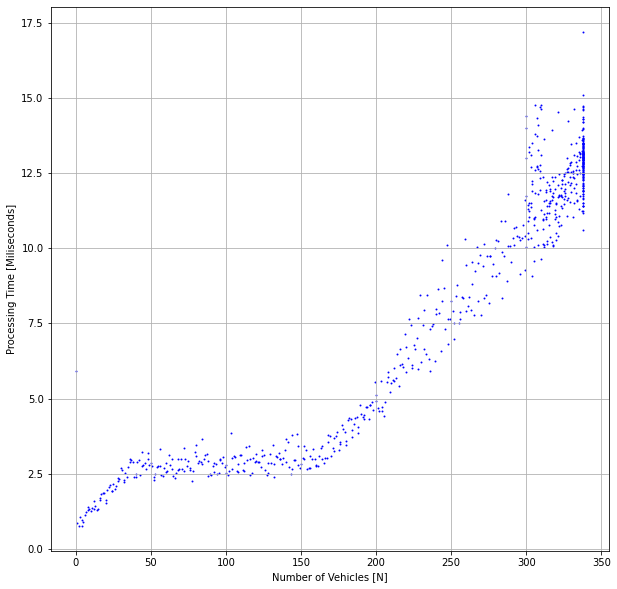

In [11]:
import matplotlib.pyplot as plt 

f,ax = plt.subplots(figsize=(10,10))
ax.scatter(nv,[x*1000 for x in t],s=0.9,c='b')
ax.grid()
plt.xlabel("Number of Vehicles [N]")
plt.ylabel("Processing Time [Miliseconds]");

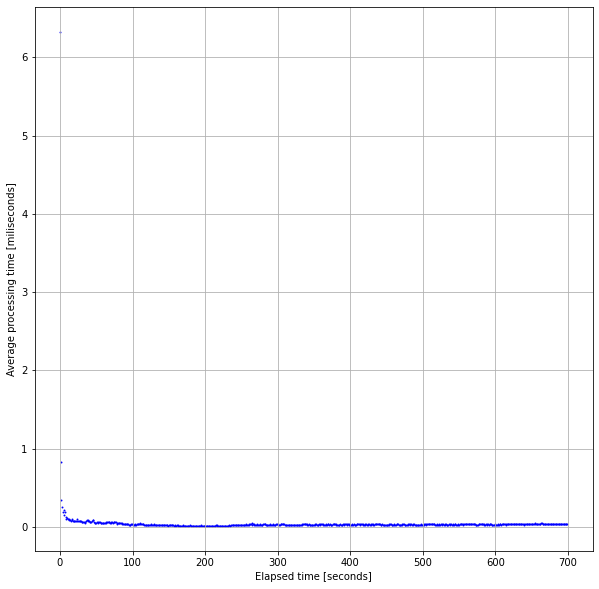

In [7]:
f,ax = plt.subplots(figsize=(10,10))
ax.scatter(range(len(t)),[1000* x/max(y,1) for x,y in zip(t,nv)],s=0.9,c='b')
ax.grid();
plt.xlabel("Elapsed time [iterations]");
plt.ylabel("Average processing time [miliseconds]");